In [1]:
import pandas as pd

In [2]:
fb = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/fakebook_buzzfeed_2018.csv')

## Q1
Calculate and display the following statistics for `fb_engagement`, which gives number of likes for each fake news article.

- min
- max
- mean
- median
- 75th percentile
- 90th percentile
- variance 

In [3]:
# variance and 90th quantile
# can also access a single variable more concisely with fb.fb_engagement
# using loc because this method has many more applications. see the cookbook

fb.loc[:, 'fb_engagement'].var(),  fb.loc[:, 'fb_engagement'].quantile(.90)

(1507342177.9259107, 1555.0)

In [4]:
# rest
fb.describe()

,fb_engagement
count,1.396100e+04
mean,3.103506e+03
std,3.882450e+04
min,0.000000e+00
25%,2.000000e+00
50%,5.200000e+01
75%,2.540000e+02
max,2.383021e+06


## Q2 
Does the variance you calcualted make sense with the histogram of this variable displayed in class? Justify your answer in a sentence or two.

For excel users: Put this text in a clearly labeled cell of your spreadsheet.

For python users: Put this in a comment (e.g. `# my comment starts like this`) or in a markdown type cell.

### Answer:
The variance is huge, which makes sense because we saw in class that while by far most observations had small values there were some with huge values of 1 million likes or more.

## Q3
- Create a bar plot with the several largest categories by number of posts. Bars can be horizontal or vertical. Number of categories to display should be at least four, but otherwise use your discretion.
- Add an appropriate title

For excel users: You can use the default number of categories excel chooses.

For python users: You will first need to create a dataframe with the number of observations by category. Attend the Thursday demo!

In [5]:
fbcount = fb.groupby('category').count()

fbcount

,title,url,fb_engagement,published_date,source
category,,,,,
12minutos.com,424,424,424,424,0
24aktuelles.com,66,66,66,66,0
Adam Shaw,1,1,1,1,0
Admin,623,623,623,623,0
Adobo Chronicles,6,6,6,6,0
...,...,...,...,...,...
Washington,13,13,13,13,0
Wendy Mcqueen,1,1,1,1,0
Wordpress Username,12,12,12,12,0


<AxesSubplot:title={'center':'Fake news posts on Facebook in 2018 \n categories with at least 500 posts'}, xlabel='category'>

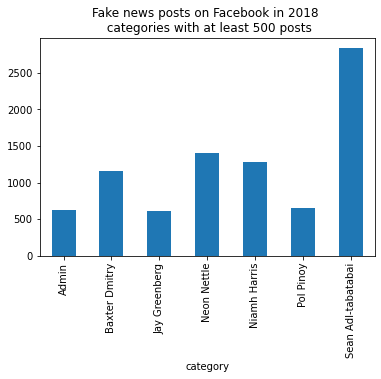

In [13]:
# can use title as count variable since all have titles
fbcount.loc[fbcount.loc[:, 'title'] > 500, 'title'].plot(kind = 'bar', title = 'Fake news posts on Facebook in 2018 \n categories with at least 500 posts')

## Q4
How many posts total are in categories with less than or equal to 50 posts? In other words, add up the number of posts only for categories for which the numbers of posts in the category is $\le 50$

In [7]:
fbcount.loc[fbcount.loc[:, 'title'] <= 50, 'title'].sum()

1155

## Q5
What *proportion* of posts are in categories with less than or equal to 50 posts?

In [8]:
# number above divided by total
# DataFrame.shape attribute gives the number of rows, columns

fbcount.loc[fbcount.loc[:, 'title'] <= 50, 'title'].sum() / fbcount.loc[:, 'title'].sum()

0.09743546482200101

## Q6
Repeat Q4, 5 but with the number 50 replaced by 1000. This should be easy and demonstrates the value of using statistical software, which allows changing minor parameters to get a wide range of results.

In [9]:
fbcount.loc[fbcount.loc[:, 'title'] <= 1000, 'title'].sum(), fbcount.loc[fbcount.loc[:, 'title'] <= 1000, 'title'].sum() / fbcount.loc[:, 'title'].sum()

(5182, 0.4371520161970643)

## Alternatives

<AxesSubplot:title={'center':'Fake news posts on Facebook in 2018 \n categories with at least 500 posts'}, xlabel='category'>

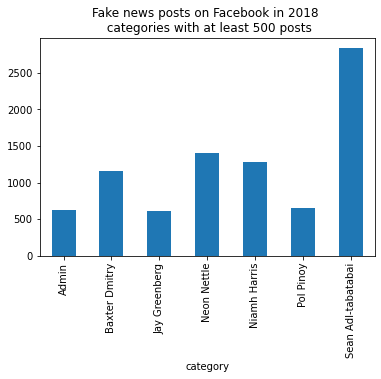

In [10]:
# a more concise version of Q2 using the query method that doesn't require separate dataframe
fb.groupby('category').count().query('title > 500').title.plot(kind = 'bar',
                                                               title = 'Fake news posts on Facebook in 2018 \n categories with at least 500 posts')

In [11]:
# a shortcut for fb.groupby('category').count() when we care only about counts per category, the situation here
# again, I show groupby because we will be able to do so much more with that method
fb.category.value_counts()

Sean Adl-tabatabai    2835
Neon Nettle           1399
Niamh Harris          1284
Baxter Dmitry         1154
Pol Pinoy              654
                      ... 
Joan Dennison            1
Attorney General         1
Vanessa Kirby            1
John Thomas              1
Jacob Pramuk             1
Name: category, Length: 165, dtype: int64

In [12]:
# so do Q6 like this, for example
fbc_series = fb.category.value_counts()

# .loc[] without comma selects rows of a data frame, or elements of a series (like you are doing here) 
fbc_series.loc[fbc_series <= 1000].sum() / fbc_series.sum()

0.4371520161970643